In [1]:
import sys
import rootpath
sys.path.append(rootpath.detect())
import numpy as np
import matplotlib.pyplot as plt

from testsuite.utilities import Pareto_split

## Simmplex sampling
$$
\mathbf{s} = (s_1, s_2, \cdots, s_M)\\
$$
where
$$
s_j \in \Bigg\{\frac{0}{H},\frac{1}{H},\cdots,\frac{H}{H}\Bigg\}, \sum^{M}_{j=1}s_j = 1
$$
and $H$ is the number of divisions in each objective, and $M$ is the number of objectives.

In [2]:
M = 3
H = 50

sj = np.array([i/H for i in range(H+1)])
print(sj.shape)

s = []
for s1 in sj:
    for s2 in sj:
        for s3 in sj:
            if np.round_(s1+s2+s3, decimals=9) == 1.0:
                s.append([s1, s2, s3])
s = np.array(s)

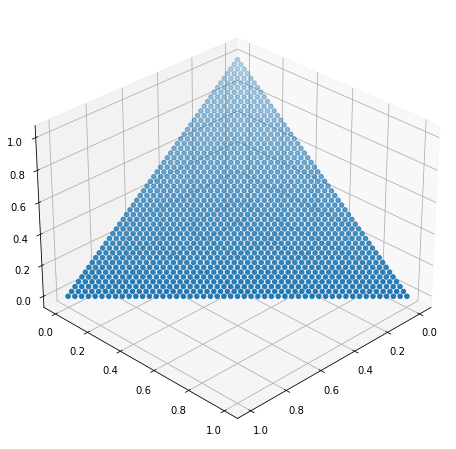

In [5]:
fig = plt.figure(figsize=[8,8])
ax = fig.gca(projection='3d')
ax.scatter(*s.T)
ax.view_init(30, 45)

In [6]:
mags = np.array([np.linalg.norm(i) for i in s])
sp = (s.T/mags).T

(1326,)

In [8]:
%matplotlib qt
fig = plt.figure(figsize=[8,8])
ax = fig.gca(projection='3d')
ax.scatter(*sp.T)
ax.view_init(30, 45)

In [10]:
%matplotlib qt
fig = plt.figure(figsize=[8,8])
ax = fig.gca(projection='3d')
ax.scatter(*(sp*np.array([2, 4, 6])).T)
ax.view_init(30, 45)

In [9]:
M = 3

In [12]:
def f1(x):
    x = x.reshape(-1)
    assert x.shape[0]==3
    return 2*np.prod([1-np.cos((xi*np.pi)/2) for xi in x[:-1]])

In [13]:
def f2(x):
    x = x.reshape(-1)
    assert x.shape[0]==3
    return 4*np.prod([1-np.cos(np.pi/2*xi) for xi in x[:-2]])*(1-np.sin((x[-1]*np.pi)/2))

In [14]:
def fm_1(x):
    x = x.reshape(-1)
    assert x.shape[0]==3
    return 2*(3-1)*(1-np.cos(np.pi/2*x[0]))*(1-np.sin(np.pi/2*x[1]))

In [15]:
def fm(x):
    x = x.reshape(-1)
    assert x.shape[0]==3
    return 2*M*(1-(x[0]*np.cos(5*np.pi*x[0])**2))

In [16]:
x = np.random.uniform(0,1,size=[2000,3])
x.shape

(2000, 3)

In [17]:
def f(x):
    return np.array([[f1(xi), fm_1(xi), fm(xi)] for xi in x])

In [18]:
y = f(x)
y.shape

(2000, 3)

In [20]:
p, d = Pareto_split(y)
p.shape

(675, 3)

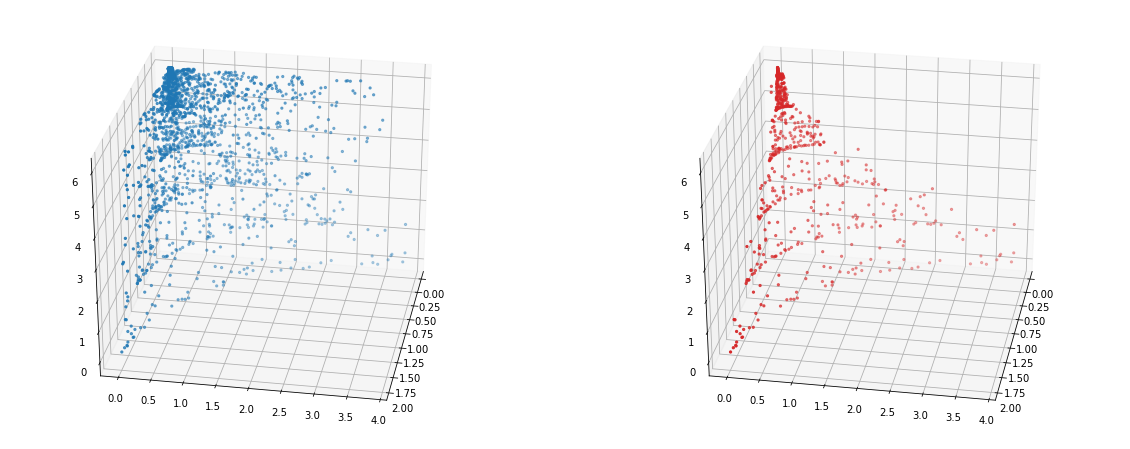

In [26]:
fig = plt.figure(figsize=[20,8])
ax0 = fig.add_subplot(1,2,1, projection='3d')
ax1 = fig.add_subplot(1,2,2, projection='3d')
ax0.scatter(*y.T, s=5)
ax1.scatter(*p.T, s=5, c="C3")
ax0.view_init(30, 10)
ax1.view_init(30, 10)

In [28]:
def get_x2(s1, s2):
    n=0
    B = s2/s1
    A = 2*(np.pi*n+np.arctan((2**0.5*(B)-1)/(2*B-1)))
    return 2*A/np.pi

In [ ]:
def get_xm_2(s2, s3, xm_1):
    n=0
    B = s3/s2
    A = 2*(np.pi*n+(np.arctan((1-2**0.5*(-B*sin(xm_1)-1))/(2*B*sin(xm_1)-2*B+1)))
    return 2*A/np.pi

In [ ]:
def get_x1(s3, s2):
    B = s3/s2
    